In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **SPRINT-1**

IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import datasets
from keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

LOADING DATASET

In [4]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


ANALZE DATA

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

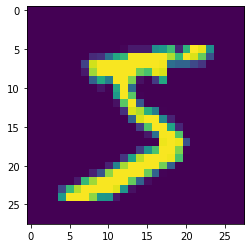

In [6]:
plt.imshow(x_train[0])

RESHAPING THE DATA

In [7]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

ONE HOT ENCODING

In [8]:
number_of_classes = 10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### **SPRINT-2**



MODEL CREATING

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

COMPILING MODEL

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])


TRAINING THE MODEL

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 188s 100ms/step - loss: 0.1344 - accuracy: 0.9612 - val_loss: 0.1011 - val_accuracy: 0.9688
Epoch 2/3
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0808 - val_accuracy: 0.9773
Epoch 3/3
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0976 - val_accuracy: 0.9741


OBSERVING THE METRICS

In [ ]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

TESTING THE MODEL

In [17]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 285ms/step
[[1.7525821e-08 4.0633626e-13 3.9985000e-08 1.1363486e-07 2.6460798e-12
  2.8193817e-12 8.2970286e-16 9.9999988e-01 4.7038142e-08 3.4873986e-09]
 [8.1238312e-07 2.1310996e-06 9.9770397e-01 7.9617957e-09 1.7929283e-12
  4.3370189e-08 2.2813366e-03 2.0247149e-11 1.1802483e-05 7.0540640e-14]
 [7.1106851e-06 9.9975628e-01 4.7303296e-05 1.9670459e-08 4.0005157e-06
  2.0716427e-05 5.5409583e-07 4.8012410e-08 1.6347090e-04 4.4503449e-07]
 [9.9999988e-01 1.6553191e-15 1.5647736e-10 6.2535943e-15 1.2281479e-11
  1.5777328e-09 1.5289697e-07 3.2646004e-12 8.6096165e-11 3.8977532e-09]]


In [18]:
print(np.argmax(prediction, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model.save("model.h5")

In [42]:
model = load_model("model.h5")
for index in range(10):
  img = Image.open('/content/drive/MyDrive/data/'+str(index)+'.jpg').convert("L")
  img = img.resize((28, 28))
  im2arr = np.array(img)
  im2arr = im2arr.reshape(1, 28, 28, 1)
  results  = model.predict(im2arr)
  results = np.argmax(results,axis = 1)
  print(results)


1/1 [==============================] - 0s 79ms/step
[0]
1/1 [==============================] - 0s 25ms/step
[1]
1/1 [==============================] - 0s 32ms/step
[2]
1/1 [==============================] - 0s 25ms/step
[3]
1/1 [==============================] - 0s 25ms/step
[4]
1/1 [==============================] - 0s 22ms/step
[5]
1/1 [==============================] - 0s 22ms/step
[6]
1/1 [==============================] - 0s 21ms/step
[7]
1/1 [==============================] - 0s 25ms/step
[8]
1/1 [==============================] - 0s 24ms/step
[9]


### **SPRINT-3**